In [247]:
# Bollinger Band Strategy

In [264]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
%matplotlib inline

In [249]:
# Downloading Bank Nifty from Yahoo Finance
df= yf.download("^NSEBANK", period ="5y", interval="1d")
# Set the index
#df=df.set_index(pd.DatetimeIndex(df))
#df

[*********************100%***********************]  1 of 1 completed


In [250]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-06,17710.449219,17754.150391,17636.900391,17671.400391,17671.400391,78900
2016-06-10,17830.199219,18051.500000,17815.250000,17828.599609,17828.599609,91400
2016-07-28,19050.400391,19126.750000,18998.800781,19076.550781,19076.550781,146300
2016-11-10,20200.250000,20200.250000,20200.250000,20200.250000,20200.250000,0
2016-12-12,18616.050781,18616.050781,18364.050781,18392.949219,18392.949219,0
...,...,...,...,...,...,...
2021-05-27,34664.199219,35220.800781,34529.699219,35095.050781,35095.050781,0
2021-05-28,35345.648438,35436.648438,34977.199219,35141.449219,35141.449219,0
2021-05-31,35097.449219,35584.300781,34930.101562,35526.648438,35526.648438,0


In [251]:
# Calculating the simle moving Average, Standard deviation, upper band and lower band
# get the time period (20 day)
period = 20
# Calculate the SMA
df["SMA"] = df["Close"].rolling(window = period).mean()
# Calculate the Standard deviation
df["STD"] = df["Close"].rolling(window = period).std()
# Calculate the upper Bollinger band
df["Upper"] = df["SMA"] + (df["STD"] * 2)
df["Lower"] = df["SMA"] - (df["STD"] * 2)

In [252]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
Date,,,,,,,,,,
2016-06-06,17710.449219,17754.150391,17636.900391,17671.400391,17671.400391,78900,NaN,NaN,NaN,NaN
2016-06-10,17830.199219,18051.500000,17815.250000,17828.599609,17828.599609,91400,NaN,NaN,NaN,NaN
2016-07-28,19050.400391,19126.750000,18998.800781,19076.550781,19076.550781,146300,NaN,NaN,NaN,NaN
2016-11-10,20200.250000,20200.250000,20200.250000,20200.250000,20200.250000,0,NaN,NaN,NaN,NaN
2016-12-12,18616.050781,18616.050781,18364.050781,18392.949219,18392.949219,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-05-27,34664.199219,35220.800781,34529.699219,35095.050781,35095.050781,0,33438.899902,935.440538,35309.780978,31568.018826
2021-05-28,35345.648438,35436.648438,34977.199219,35141.449219,35141.449219,0,33510.247363,1009.086105,35528.419572,31492.075154
2021-05-31,35097.449219,35584.300781,34930.101562,35526.648438,35526.648438,0,33647.489746,1088.344228,35824.178201,31470.801291


<AxesSubplot:xlabel='Date'>

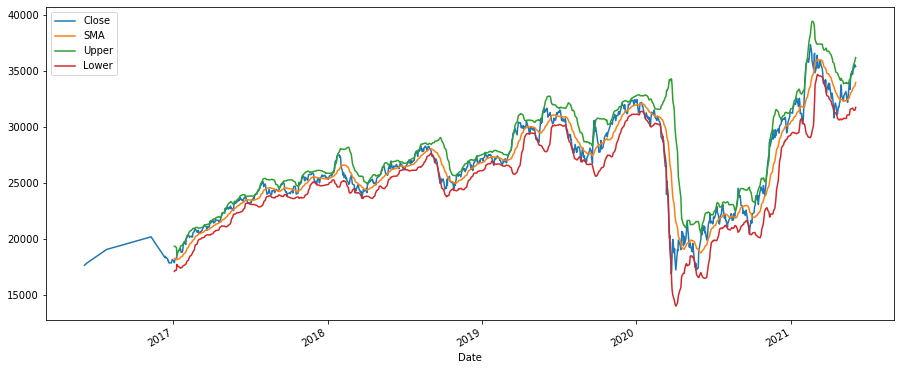

In [253]:
# Cretae  list of columns to keep the required columns
column_list = ["Close","SMA","Upper","Lower"]
#plot the data
df[column_list].plot(figsize =(15.2,6.4))

In [254]:
# Creating a buy and sell call
new_df =df[period -1:]
new_df

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
Date,,,,,,,,,,
2017-01-04,18037.449219,18092.849609,17868.900391,17891.000000,17891.000000,0,18238.542578,558.428049,19355.398676,17121.686481
2017-01-05,18000.750000,18164.050781,17977.800781,18115.949219,18115.949219,0,18260.770020,543.308264,19347.386547,17174.153492
2017-01-06,18168.449219,18325.500000,18157.300781,18264.000000,18264.000000,0,18282.540039,533.718535,19349.977108,17215.102970
2017-01-09,18314.250000,18373.099609,18256.150391,18286.650391,18286.650391,0,18243.045020,500.032668,19243.110356,17242.979683
2017-01-10,18351.449219,18441.150391,18275.750000,18409.599609,18409.599609,0,18153.512500,203.571838,18560.656176,17746.368824
...,...,...,...,...,...,...,...,...,...,...
2021-05-27,34664.199219,35220.800781,34529.699219,35095.050781,35095.050781,0,33438.899902,935.440538,35309.780978,31568.018826
2021-05-28,35345.648438,35436.648438,34977.199219,35141.449219,35141.449219,0,33510.247363,1009.086105,35528.419572,31492.075154
2021-05-31,35097.449219,35584.300781,34930.101562,35526.648438,35526.648438,0,33647.489746,1088.344228,35824.178201,31470.801291


In [255]:
# Creting a function for generatig a buy call or a sell call, by assuming Closing price with respect with the standard deviation
def get_signal(data):
    buy_signal =[]
    sell_signal =[]
    
    for i in range(len(data["Close"])):
        if data["Close"][i] > data["Upper"][i]:  # Closing value greater tha Upper value, it's a sell call. Should be optimized
            buy_signal.append(np.nan)
            sell_signal.append(data["Close"][i])
        elif data["Close"][i] < data["Lower"][i]: # Closing value lesser than lower value, it's a buy call.
            sell_signal.append(np.nan)
            buy_signal.append(data["Close"][i])
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    return(buy_signal, sell_signal)

In [256]:
# Creat a two new columns
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]

C:\Users\Admin\anaconda3\envs\Oanda1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Admin\anaconda3\envs\Oanda1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


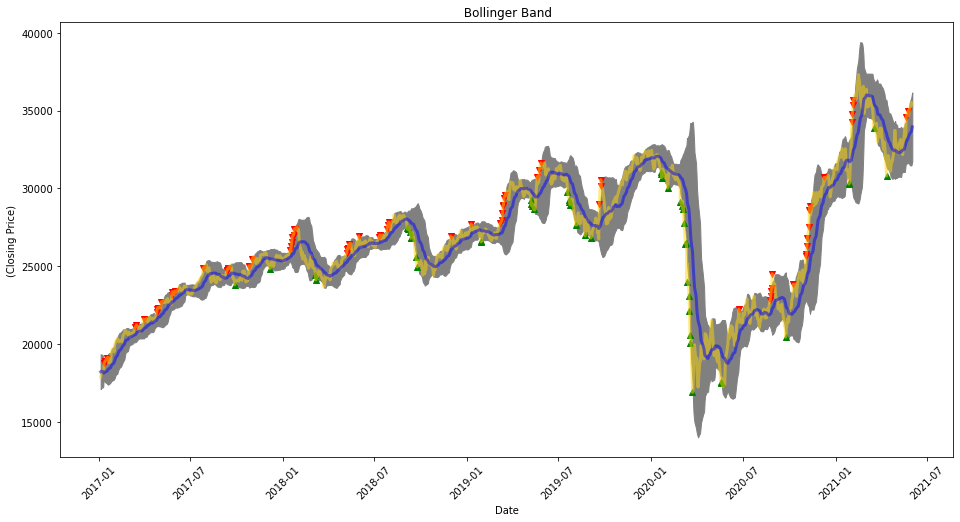

In [273]:
# Plot the data 
fig = plt.figure(figsize=(16, 8))
#ax =fig.add_subplot(111)
ax = fig.add_subplot(1, 1, 1)



#ax = plt.figure(figsize=(10,4))
# GEt the index values of the dataframe, '
x_axis = new_df.index
ax.fill_between(x_axis, new_df["Upper"], new_df["Lower"], color = 'grey')
# Plot the closing price and the moving average
ax.plot(x_axis,new_df["Close"], color ='gold', lw =3, label = "Close  Price", alpha = 0.5)
ax.plot(x_axis, new_df["SMA"], color = "blue", lw =3, label = "SMA", alpha = 0.5)
ax.scatter(x_axis, new_df["Buy"], color= "green", label ="Buy", marker ="^", alpha=1)
ax.scatter(x_axis, new_df["Sell"], color= "red", label = "Sell", marker ="v", alpha =1)
#set the title and display the plot
ax.set_title(" Bollinger Band")
ax.set_xlabel('Date')
ax.set_ylabel('(Closing Price)')
plt.xticks(rotation = 45)
ax.legend
plt.show()